# Siggi Example

### Import necessary code from repo

In [1]:
import sys
sys.path.append('..')

In [2]:
from siggi import siggi, filters, spectra, calcIG, plotting
from siggi import Sed
from siggi.lsst_utils import BandpassDict
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline

/Users/Bryce/miniconda2/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Set up filter object and get example spectra

In [3]:
f = filters()
s = spectra()
red_spec = s.get_red_spectrum()
blue_spec = s.get_blue_spectrum()

### Define redshift prior

In [4]:
def prior_z(z, z0=0.5):
    return (z**2.)*np.exp(-(z/z0)**1.5)/(np.sum((np.arange(0, 2.51, .05)**2.)*np.exp(-(np.arange(0, 2.51, .05)/z0)**1.5)))

In [5]:
# Shows the total entropy for 2 SEDs with equal weighting
entropy = -1. * .5 * np.sum(prior_z(np.arange(0.05, 2.51, .05)) * np.log2(.5 * prior_z(np.arange(0.05, 2.51, .05))))
print(entropy*2.)

5.807147751224095


### Set up a siggi object with the SEDs, the SED weights, the prior, and the redshift binning defined.

In [6]:
sig_example = siggi([red_spec, blue_spec], [0.5, 0.5], prior_z,
                    z_min=0.05, z_max=2.5, z_steps=50)

### Can also include a set of filters that are static and not moved in the optimization

Here we use the LSST *ugrizy* filters

In [7]:
frozen_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='../data/lsst_baseline_throughputs/')
# To make things more interesting we will just use the 'u' and 'g' filters.
frozen_dict = BandpassDict(frozen_dict.values()[:2], frozen_dict.keys()[:2])

### Run optimization

In [8]:
%%time
random_state = np.random.RandomState(17)
num_filters = 2
set_ratio = 1.0
res = sig_example.optimize_filters(num_filters=num_filters,
                                   filt_min=300., filt_max=1100.,
                                   sed_mags=22.0,
                                   set_ratio=set_ratio,
                                   system_wavelen_max=1200.,
                                   n_opt_points=25,
                                   optimizer_verbosity=10,
                                   procs=4, acq_func_kwargs_dict={'kappa':3},
                                   frozen_filt_dict=frozen_dict, frozen_filt_eff_wavelen=[365, 477],
                                   starting_points = None,
                                   rand_state = random_state)

[(300.0, 1100.0), (300.0, 1100.0), (300.0, 1100.0), (300.0, 1100.0)] [[300.0, 566.6666666666667, 833.3333333333334, 1100.0], [300.0, 433.33333333333337, 566.6666666666667, 700.0], [700.0, 833.3333333333334, 966.6666666666667, 1100.0], [354.3202865530331, 453.2166295579959, 535.7320021496878, 724.4694044842353], [760.4823150024272, 810.0167168349087, 825.0668174206844, 929.5883679999306], [331.2503329510932, 348.0357442523083, 586.2508835868391, 1056.5465494547261], [340.95493249636297, 821.9348923725239, 991.2336828369688, 1001.8324209184242], [526.3905286855929, 686.8228994480016, 741.4010949079002, 778.0106025912407], [538.1805746414173, 616.8379488376213, 749.2071242610889, 930.9605677431197], [344.193080172659, 415.1231366202623, 420.72535553654166, 634.7875082767016]]
[300.0, 566.6666666666667, 833.3333333333334, 1100.0] 2.2033668318464197
[354.3202865530331, 453.2166295579959, 535.7320021496878, 724.4694044842353] 1.7163287982119089
[300.0, 433.33333333333337, 566.6666666666667, 

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:  1.3min remaining:  1.3min


[340.95493249636297, 821.9348923725239, 991.2336828369688, 1001.8324209184242] 2.2681607846985052
[526.3905286855929, 686.8228994480016, 741.4010949079002, 778.0106025912407] 2.82883152645964
[331.2503329510932, 348.0357442523083, 586.2508835868391, 1056.5465494547261] 2.017513943231301


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:  1.3min remaining:   33.9s


[538.1805746414173, 616.8379488376213, 749.2071242610889, 930.9605677431197] 3.0019292975084477
[344.193080172659, 415.1231366202623, 420.72535553654166, 634.7875082767016] 1.1747450064126568


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.7min finished


-3.046136511302787 10
[559.2529285898182, 919.5358918851564] [[558.5949889007854, 558.5949889007854, 559.910868278851, 559.910868278851], [765.2768787811308, 765.2768787811308, 1073.794904989182, 1073.794904989182]]
[618.8967752142162, 899.4906190869985] [[584.6487729909522, 584.6487729909522, 653.1447774374801, 653.1447774374801], [782.5462281854165, 782.5462281854166, 1016.4350099885805, 1016.4350099885805]]
[618.8969834388608, 899.4907386569448] [[584.6490056991781, 584.6490056991781, 653.1449611785436, 653.1449611785434], [782.5465582186907, 782.5465582186907, 1016.4349190951989, 1016.4349190951988]]
[755.7752384803755, 1026.2100116055424] [[693.948633662804, 693.948633662804, 817.601843297947, 817.6018432979471], [954.415302377763, 954.415302377763, 1098.0047208333217, 1098.0047208333217]]
[558.5949889007854, 559.910868278851, 765.2768787811308, 1073.794904989182] 0.7428394081786118


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   36.7s


[584.6490056991781, 653.1449611785434, 782.5465582186907, 1016.4349190951988] 3.142164605883128
[584.6487729909522, 653.1447774374801, 782.5462281854165, 1016.4350099885805] 3.1422887225888254


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   37.0s remaining:   37.0s


[693.948633662804, 817.6018432979471, 954.415302377763, 1098.0047208333217] 3.122308157003686


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   37.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   37.3s finished


-3.1422887225888254 14
[596.9692379366668, 855.4527240053078] [[554.3051534002944, 554.3051534002946, 639.633322473039, 639.633322473039], [766.2537169205333, 766.2537169205334, 944.6517310900822, 944.6517310900822]]
[596.9685591295427, 851.5687539147127] [[554.3041379611939, 554.3041379611939, 639.6329802978914, 639.6329802978914], [766.2533077062271, 766.2533077062271, 936.8842001231983, 936.8842001231984]]
[596.9702572411798, 923.0790524551637] [[554.3057921379274, 554.3057921379273, 639.6347223444322, 639.6347223444322], [766.2544172529978, 766.2544172529979, 1079.9036876573296, 1079.9036876573296]]
[596.9719642512782, 878.0980437869282] [[554.3091983211696, 554.3091983211696, 639.6347301813869, 639.6347301813869], [766.2564836389835, 766.2564836389834, 989.939603934873, 989.939603934873]]
[554.3051534002944, 639.633322473039, 766.2537169205333, 944.6517310900822] 3.042013873419321
[554.3057921379274, 639.6347223444322, 766.2544172529978, 1079.9036876573296] 3.1210213547453582


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   34.7s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   34.9s remaining:   34.9s


[554.3041379611939, 639.6329802978914, 766.2533077062271, 936.8842001231984] 3.0321506647360534
[554.3091983211696, 639.6347301813869, 766.2564836389835, 989.939603934873] 3.096354292014408


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   35.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   35.1s finished


-3.1422887225888254 18
[623.757267962827, 921.5663500586236] [[591.6992148592324, 591.6992148592324, 655.8153210664216, 655.8153210664217], [789.9904697137925, 789.9904697137927, 1053.1422304034545, 1053.1422304034545]]
[623.7452822452867, 919.5487062297483] [[591.6819106330429, 591.6819106330429, 655.8086538575305, 655.8086538575304], [786.0064277321314, 786.0064277321314, 1053.0909847273651, 1053.0909847273651]]
[623.7616176063158, 941.8274144330157] [[591.7051284057441, 591.7051284057441, 655.8181068068875, 655.8181068068875], [830.4938384455921, 830.493838445592, 1053.1609904204395, 1053.1609904204395]]
[623.757068425091, 919.5361507287257] [[591.6989334212273, 591.6989334212273, 655.8152034289548, 655.8152034289548], [785.9299856539716, 785.9299856539715, 1053.14231580348, 1053.14231580348]]
[591.6992148592324, 655.8153210664217, 789.9904697137925, 1053.1422304034545] 3.145012634417633


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   34.3s


[591.7051284057441, 655.8181068068875, 830.4938384455921, 1053.1609904204395] 3.186916870267331
[591.6819106330429, 655.8086538575304, 786.0064277321314, 1053.0909847273651] 3.142136592787644


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   34.6s remaining:   34.6s


[591.6989334212273, 655.8152034289548, 785.9299856539716, 1053.14231580348] 3.1419896004530607


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   34.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   34.8s finished


-3.186916870267331 22
[624.0372837311265, 990.0681129349634] [[592.0627330570821, 592.0627330570821, 656.0118344051709, 656.011834405171], [926.4826914323495, 926.4826914323494, 1053.6535344375775, 1053.6535344375775]]
[623.1015835204043, 984.6734349224673] [[590.7087420076208, 590.7087420076209, 655.4944250331878, 655.4944250331878], [918.9202543026628, 918.9202543026627, 1050.426615542272, 1050.426615542272]]
[622.9931094909334, 989.65768012513] [[590.5195340255498, 590.5195340255498, 655.4666849563171, 655.4666849563172], [932.1839681373185, 932.1839681373185, 1047.1313921129415, 1047.1313921129415]]
[623.2396538781225, 987.1739741096054] [[590.943532456244, 590.9435324562442, 655.5357753000008, 655.5357753000008], [921.0797717360463, 921.0797717360463, 1053.2681764831646, 1053.2681764831646]]
[592.0627330570821, 656.011834405171, 926.4826914323495, 1053.6535344375775] 3.066586205350893
[590.7087420076208, 655.4944250331878, 918.9202543026628, 1050.426615542272] 3.0951343331170476
[

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   34.2s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   34.3s remaining:   34.3s


[590.943532456244, 655.5357753000008, 921.0797717360463, 1053.2681764831646] 3.090603725280215


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   34.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   34.4s finished


-3.186916870267331 26
CPU times: user 1min 22s, sys: 7.36 s, total: 1min 29s
Wall time: 5min 21s


### Find the best results

In [9]:
min_idx = np.argmin(res.yi)

In [10]:
best_pt = res.Xi[min_idx]

In [11]:
best_val = np.min(res.yi)

In [12]:
print(best_pt, best_val)

[591.7051284057441, 655.8181068068875, 830.4938384455921, 1053.1609904204395] -3.186916870267331


### Plot with Siggi's plotting code

In [13]:
red_spec.redshiftSED(0.5)
blue_spec.redshiftSED(0.5)
sig_plot = plotting([red_spec, blue_spec], best_pt, set_ratio=1.0,
                    frozen_filt_dict=frozen_dict, frozen_filt_eff_wavelen=[365, 477],
                    sed_mags=22.0)

#### Let's first make a plot of the new filters along with the filters we've frozen in place. For reference we'll also include the SEDs at redshift z=0.5.

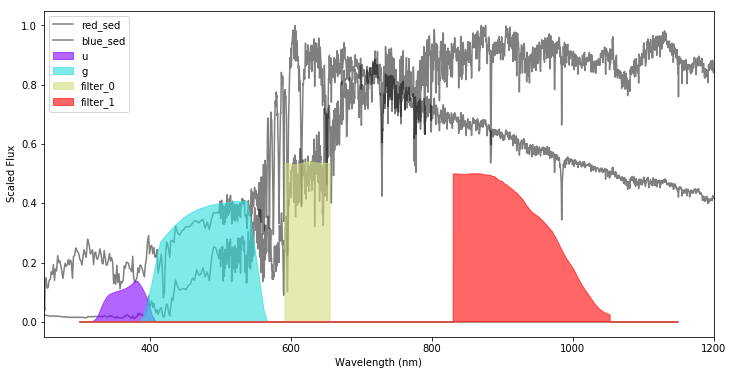

In [14]:
fig = sig_plot.plot_filters()
plt.legend(['red_sed', 'blue_sed'] + sig_plot.filter_dict.keys())

#### We can also look at a color-color plot of the new color values for each sed as it increases in redshift and the error bars on the colors

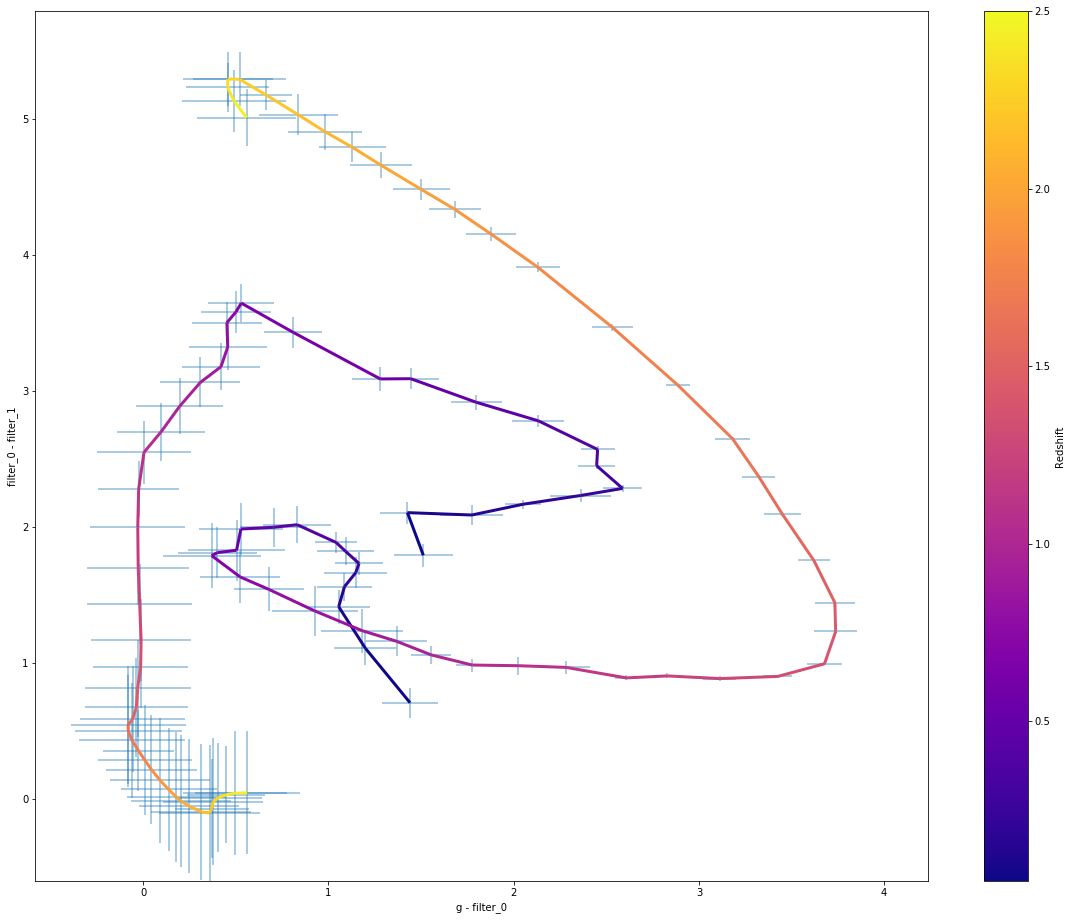

In [15]:
fig = plt.figure(figsize=(20,16))
fig = sig_plot.plot_color_color(['g', 'filter_0', 'filter_0', 'filter_1'],
                                np.linspace(0.05, 2.5, 50), fig=fig)

../siggi/filters.py:127: RuntimeWarning: divide by zero encountered in double_scalars
  frac_a1 = half_area/a1
../siggi/filters.py:128: RuntimeWarning: invalid value encountered in double_scalars
  length_ha = np.sqrt(frac_a1*(filt[1] - filt[0])**2.)


Text(0,0.5,'Filter 2 Center Wavelength (nm)')

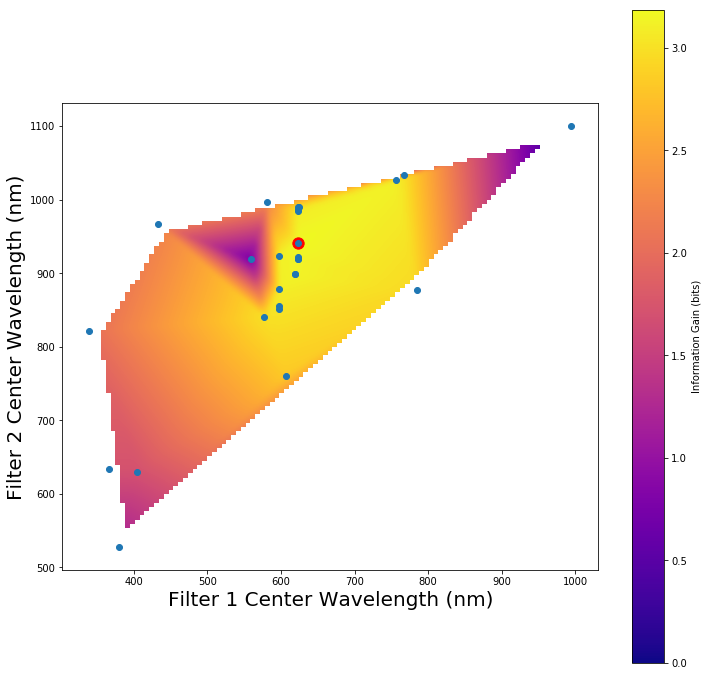

In [16]:
fig = plt.figure(figsize=(12,12))
xi, yi = sig_plot.plot_ig_space(res.Xi, np.abs(res.yi), [0,1], return_centers=True)
cbar = plt.colorbar()
cbar.set_label('Information Gain (bits)')
plt.scatter(best_pt[0] + (best_pt[1]-best_pt[0])/2., best_pt[2] + (best_pt[3]-best_pt[2])/2., c='r', s=128)
plt.scatter(xi, yi)
plt.xlabel('Filter 1 Center Wavelength (nm)', size=20)
plt.ylabel('Filter 2 Center Wavelength (nm)', size=20)